In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import List

## Plotting Hockey

In [19]:
def plot_mpo_hockey(filename: str, discrete: bool):
    
    # Load the saved training metrics
    with open(filename, "r") as f:
        results = json.load(f)

    critic_losses = results["all_critic_losses"]
    actor_losses = results["all_actor_losses"]
    kl = results["all_kl"]
    kl_µ = results["all_kl_µ"]
    kl_Σ = results["all_kl_Σ"]
    opponent_metrics = results["val_opponent_metrics"]

    # Clear the current figure and set size
    fig = plt.figure(figsize=(6, 5))
    fig.clf()

    # Plot critic loss
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(1, len(critic_losses) + 1), critic_losses, marker='o', color='orange')
    plt.title("Critic Loss")
    plt.xlabel("Episode")
    plt.ylabel("Critic Loss")
    plt.grid()

    # Plot actor loss
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(1, len(actor_losses) + 1), actor_losses, marker='o', color='green')
    plt.title("Actor Loss")
    plt.xlabel("Episode")
    plt.ylabel("Actor Loss")
    plt.grid()

    # Plot KL Divergence
    plt.subplot(2, 2, 3)
    if discrete:
        plt.plot(np.arange(1, len(kl) + 1), kl, marker='o', label='KL', color='blue')
    else:
        plt.plot(np.arange(1, len(kl_µ) + 1), kl_µ, marker='o', label='KL µ', color='purple')
        plt.plot(np.arange(1, len(kl_Σ) + 1), kl_Σ, marker='o', label='KL Σ', color='red')
    plt.title("$KL_D(\pi||\pi_{{target}})$")
    plt.xlabel("Episode")
    plt.ylabel("$KL_D$")
    plt.legend()
    plt.grid()

    # Plot opponent win rates
    plt.subplot(2, 2, 4)
    if opponent_metrics:
        opponent_names = list(opponent_metrics[0].keys())
        for opp in opponent_names:
            win_rate_values = [
                iteration.get(opp, {}).get("win_rate", 0)  # Extract win_rate, default to 0 if missing
                for iteration in opponent_metrics
            ]
            plt.plot(
                np.arange(1, len(win_rate_values) + 1),
                win_rate_values,
                marker="o",
                label=f"{opp}",
            )

        plt.title("Win Rate")
        plt.xlabel("Validation Iteration")
        plt.ylabel("Win Rate")
        plt.legend(prop={'size': 6})
        plt.grid()
    
    plt.tight_layout()
    
    plt.show()

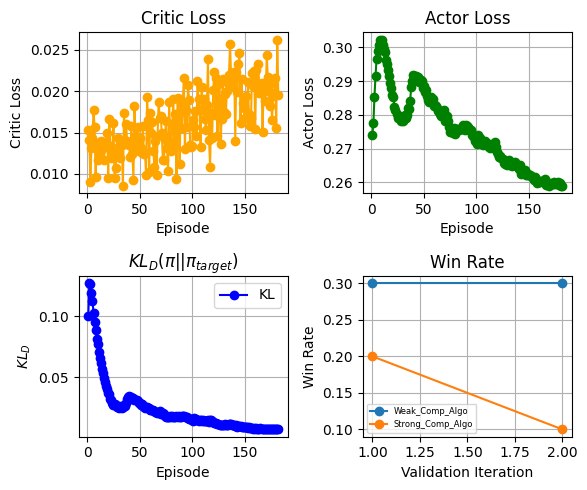

In [20]:
plot_mpo_hockey("/Users/andrepfrommer/Desktop/Project_RL/output/json_files/25-02-18 14_00_29_000000300.json", discrete=True)

## Plotting Pendulum

In [28]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [38]:
def plot_mpo_other_env(filename: str, discrete: bool):
    
    # Load the saved training metrics
    with open(filename, "r") as f:
        results = json.load(f)
    
    all_rewards = results["all_rewards"]
    all_intrinsic_rewards = results["all_intrinsic_rewards"]
    critic_losses = results["all_critic_losses"]
    actor_losses = results["all_actor_losses"]
    kl = results["all_kl"]
    kl_µ = results["all_kl_µ"]
    kl_Σ = results["all_kl_Σ"]
    
    # Clear the current figure and set size
    fig = plt.figure(figsize=(6, 5))
    
    plt.subplot(1, 1, 1)
    smoothed_rewards = moving_average(all_rewards, window_size=100)
    plt.plot(np.arange(1, len(smoothed_rewards) + 1), smoothed_rewards, marker='o', color='blue', label='Discrete')
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Pendulum-v0")
    plt.grid()
    
    plt.legend()
    plt.tight_layout()
    
    plt.show()

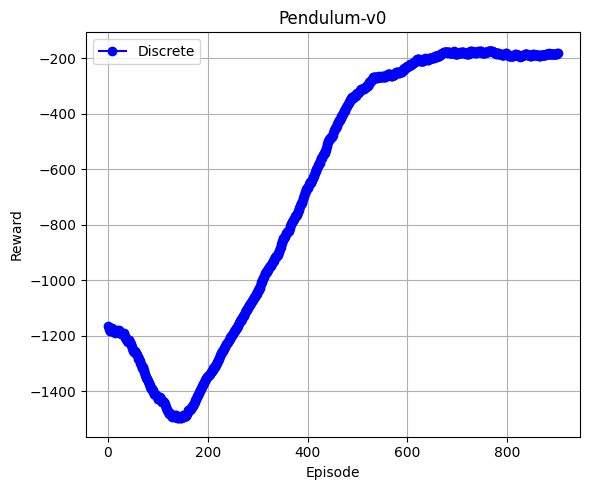

In [39]:
plot_mpo_other_env("/Users/andrepfrommer/Desktop/Project_RL/output/json_files/25-02-18 15_35_09_000001000.json", discrete=False)